In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
sp.init_printing()

In [2]:
import datetime
import networkx as nx
from random import shuffle

from pydivest.macro_model.integrate_equations_mean import IntegrateEquationsMean as mean_model
from pydivest.macro_model.integrate_equations_aggregate import IntegrateEquationsAggregate as aggregate_model

# investment_decisions:

nopinions = [50, 50]

# Parameters:

phi, b_d = 0.4, 1.25

input_parameters = {'b_c': 1., 'phi': phi, 'tau': 1.,
                    'eps': 0.05, 'b_d': b_d, 'e': 100.,
                    'b_r0': 0.1 ** 2 * 100.,
                    'possible_opinions': [[0], [1]],
                    'xi': 1. / 8., 'beta': 0.06,
                    'L': 100., 'C': 100., 'G_0': 800.,
                    'campaign': False, 'learning': True,
                    'R_depletion': False, 'test': True,
                    'interaction': 1, 'crs': True}

# investment_decisions
opinions = []
for i, n in enumerate(nopinions):
    opinions.append(np.full((n), i, dtype='I'))
opinions = [item for sublist in opinions for item in sublist]
shuffle(opinions)

# network:
N = sum(nopinions)
p = .2

while True:
    net = nx.erdos_renyi_graph(N, p)
    if len(list(net)) > 1:
        break
adjacency_matrix = nx.adj_matrix(net).toarray()

# investment
clean_investment = np.ones(N)
dirty_investment = np.ones(N)

init_conditions = (adjacency_matrix, opinions,
                   clean_investment, dirty_investment)

In [3]:
mm = mean_model(*init_conditions, **input_parameters)
mm.run(t_max=200)
mm.R_depletion = True
mm.run(t_max=600)
trj_m = mm.get_unified_trajectory()

pi = 0.5, xi = 0.125, kappa_c = 0.375, kappa_d = 0.5
got superfluous keyword arguments
dict_keys(['possible_opinions', 'beta', 'campaign', 'learning'])
resetting parameter values to
{b_c: 1.0, b_d: 1.25, b_R: 1.0000000000000002, e: 100.0, s: 0.23, delta: 0.06, pi: 0.5, kappa_c: 0.375, kappa_d: 0.5, xi: 0.125, g_0: 8.0, p: 1.0, G_0: 800.0, P: 100.0, epsilon: 0.05, phi: 0.4, tau: 1.0, k: 10.05, N: 1.0}
sucessfull
integrating equations from t=0 to t=200
integrating equations from t=200 to t=600=====================] 101.1% ...mean approximation running


In [4]:
ma = aggregate_model(*init_conditions, **input_parameters)
ma.run(t_max=200)
ma.R_depletion = True
ma.run(t_max=600)
trj_a = ma.get_unified_trajectory()

pi = 0.5, xi = 0.125, kappa_c = 0.375, kappa_d = 0.5
got superfluous keyword arguments
dict_keys(['possible_opinions', 'beta', 'campaign', 'learning'])
resetting parameter values to
{b_c: 1.0, b_d: 1.25, b_R: 1.0000000000000002, e: 100.0, s: 0.23, delta: 0.06, pi: 0.5, kappa_c: 0.375, kappa_d: 0.5, xi: 0.125, g_0: 8.0, p: 1.0, G_0: 800.0, P: 100.0, epsilon: 0.05, phi: 0.4, tau: 1.0, k: 10.05, N: 1.0}
sucessfull
integrating equations from t=0 to t=200
integrating equations from t=200 to t=600====================] 100.5% ...mean approximation running


In [5]:
for c in trj_m.columns:
    dif = trj_m[[c]] - trj_a[[c]]
    dif_cum = dif.cumsum()
    max_dif = dif_cum.max()
    print(max_dif)

k_c    0.000076
dtype: float64
k_d    2.537082e-11
dtype: float64
l_c    0.000006
dtype: float64
l_d    9.685253e-12
dtype: float64
g    0.00002
dtype: float64
c    0.000498
dtype: float64
r    1.995053e-13
dtype: float64
n_c    0.000003
dtype: float64
i_c    0.000004
dtype: float64
r_c    4.639447e-07
dtype: float64
r_d    0.000002
dtype: float64
w    1.970775e-07
dtype: float64
W_c    0.000001
dtype: float64
W_d    8.664847e-12
dtype: float64


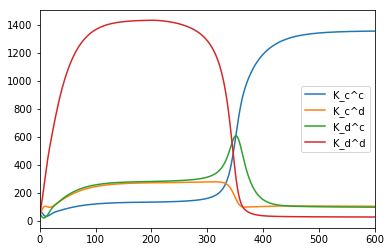

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ma.get_aggregate_trajectory()[['K_c^c', 'K_c^d', 'K_d^c', 'K_d^d']].plot(ax=ax)

In [7]:
trj_a.columns

Index(['k_c', 'k_d', 'l_c', 'l_d', 'g', 'c', 'r', 'n_c', 'i_c', 'r_c', 'r_d',
       'w', 'W_c', 'W_d'],
      dtype='object')